# Case Study Five
## Firewall Implementation

#### David Grijalva, Nicole Norelli, & Mingyang Nick YU
#### 10/29/2021
 
**Abstract**  

The following deliverable investigated and predicted whether to allow, deny, or drop access to incoming requests for a large company with many firewall interactions. SVC (Support Vector Classifier) and SGD (Stochastic Gradient Descent) using 'log' loss were the primary machine learning methods used for classification. Both methods generated superb prediction, precision, and recall for each class; however, SGD was much faster to train in comparison.

## 1. Introduction  

This case study focused on predicting how to deal with internet requests coming in for a large company with many firewall interactions. The original dataset had 65,532 instances. Each instance was one previous incoming traffic that had been logged, and the decision made for that incoming traffic by a cyber security expert. There were four class of actions labeled: allow (allow the request to pass), deny (block traffic and enforce default denied action defined), drop (silently drop the traffic), and reset-both (sent TCP reset to both client and server devices). However, based on the company feedback, reset-both was not a primary interest for the company and that class's instances were dropped accordingly. This reduced the total instances to 65,478. There was no missing data, and other than actions taken, there were 11 features of each request being logged (Table 1).

|Feature Name | Description |
|---|---|
| Source Port | Client Source Port |
| Destination Port | Client Destination Port |
| NAT Source Port | Network Address Translation Source Port |
| NAT Destination Port | Network Address Translation Destination Port |
| Bytes | Total Bytes |
| Bytes Sent | Total Bytes Sent |
| Bytes Received | Total Bytes Received |
| Packets | Total Packets |
| Elapsed Time (sec) | Elapsed Time for flow in seconds |
| pkts_sent | Total Packets Sent |
| pkts_received | Total Packets Received |

<div align="center"> Table 1: Feature Description </div> 
<br>


### Support Vector Machine

Support-vector machines (SVM) are supervised learning models used to deal with small to medium size datasets for classification and regression analysis. The original idea behind SVM is applied to some data point being considered within a $p$-dimensional vector space where the point belongs to one of two classes. The goal is to decide to which class this data point belongs. The algorithm attempts to find a $(p - 1)$-dimension hyperplane to perfectly separate the classes in order to determine which class a data point belongs to. In a perfect world, there could be many choices for the hyperplane; however, the best hyperplane would be the one that represents the largest separation or margin ($\frac{1} {\lVert\beta\rVert}$) between the two classes. This problem has been solved by the following equation, and the largest margin corresponds to the smallest $\beta$, note: this equation solves for a SVM that is perfectly separable.

<div align="center"> $y_{i} (x_{i}^T \beta + \beta_0) \geqslant M\lVert\beta\rVert$ </div> 
<br>

In reality, a straight line (hyperplane in 2 dimensions) can rarely separate two classes perfectly, thus error terms were introduced to the right side of the equation to account for such problem in the real world. 

For SVM, a new type of loss called "Hinge" was introduced. Negative distance correspond to the wrong side of the hyperplane (misclassification). However, what makes "Hinge" loss unique is that points that are correctly classified but within the boundary of the margin can still contribute to the loss. Only points far away from the boundary and classified correctly would contribute no loss to the equation. There are different type of Hinge Loss including linear or quadratic. 

What makes SVM very powerful is the Kernel Trick. This allows data points from original $p$-dimension to be projected into a even higher dimension, and finding the best hyperplanes from different higher dimensions can separate classes better. The kernel trick relies on a transformation and a dot product in order to convert the points into this higher dimension. It is called "trick" because the transformation of data into this high dimension never needs to happen. Only the final result of the dot product is needed for the loss function to be optimized. There are many popular kernels including Linear, Polynomial, RBF and sigmoid. 

It is worth noting that SVM does not scale well to Big Data $O(n^2)$ complexity. SVM needs to find the "nearest" points, thus each point must be compared to all other points. When transformation is involved, a matrix of all dot products needs to be stored. SVM also does not provide probabilities of outcome like some other classifiers do. It only supplies hard limits (either class -1 or class 1).

### Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a variant of gradient descent. It is an iterative method for optimizing an objective function with suitable smoothness properties. Gradient descent uses formula:

<div align="center"> $m_{n+1} = m_{n} - \alpha \bigtriangledown{J(m)} $ </div> 
<br>

The new slopes $n+1$ are the old slopes subtracting the derative of the loss function $J$ times a small learning rate of $\alpha$. What makes SGD unique is rather than take all the data at once, it takes a sample/batch of the data to estimate the new slopes as below,

<div align="center"> $m_{n+1} = m_{n} - \alpha \bigtriangledown{Q(m)} $ </div> 
<br>

where $Q$ is the approximation of $J$.

This makes SGD no longer confined to limited memory size and able to process much larger datasets as it scans through the data and samples them in batches. There is a new concept called "epoch", one epoch just means the entire data has been swept through once. 

#### Hashing Trick & Hashing Collisions

The hashing trick is a key to quickly making a vector available in memory. It utilizes hashing functions which produce a fixed-length unique output, and all features as well as its values are mapped into memory quickly using hashing functions. However, with larger feature space, it is possible for two columns to have the same address, which is known as a hashing collision. Scholars suggest that this is not a problem, and the solution is to make memory space for hash functions big enough to hash all the features in the dataset. 
<br>

### Ridge Regression (L2)

The regularization type used for SGD by default is Ridge or L2. The penalty for this is the squared coefficients multiplied by Lambda, which controls the strength of the penalty. Unlike L1 regularization, L2 does not provide feature selection. All features are penalized uniformly but will never reach to zero. In general, L2 is the primary regularization method used to prevent overfitting the model. 

<b>Penalty Term</b>  
$\lambda \sum\limits_{j=0}^k m_j ^2 $   
Where $\lambda $ is the strength of the penalty. If $\lambda=0 $ then there would be no penalty applied and the original coefficient would be returned. 


## 2. Methods

### Initial Data Observations

This data set contained 12 features for 65,532 requests. The data set was complete, with no missing data. The response variable was "Action", and there were four different categories of "Action" in the original data: allow, deny, drop, and reset-both. Upon examination, the category "reset-both" had only 54 instances. Because the category was so rare, all requests that resulted in "reset-both" were removed from the data set for this analysis. After this removal, there were three response categories for the remaining 65,478 requests.  

Exploration of correlations between the numeric variables in the data set showed high correlation (>.95) between "Bytes" and "Packets", "Bytes" and "pkts_set", and "Packets" and "pkts_set." While these correlations were high, none were above .99 and all features were retained for analysis.  

#### Feature Creation  

Two new features were created for analysis: "Source Need NAT" and "Destination Need NAT." The function need_NAT_or_not returned a 0 if the NAT Source Port or NAT Destination Port was 0 and a 1 if it was any other value. Port 0 is unusual in that it is a "wildcard port" and is often blocked for network security <a href="https://www.lifewire.com/port-0-in-tcp-and-udp-818145">(more information here)</a>.


#### Categorical & Numeric Features

While all features in the data set except the response "Action" were in the form of numbers, several features were in fact categorical. A list of the categorical features (categorical_ix) contained: 'Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Source Need NAT', and 'Destination Need NAT.' While ports are assigned numbers, these are nominal and have no ordinal meaning. The remaining numeric variables (numeric_ix) were: 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', and 'pkts_received.'

#### Train/Test Split  

The data set was split into an 80% training and 20% test split. This split included a shuffle to eliminate any order effects in the data, and it was stratified because the outcome classes were imbalanced.

### Creating Models Using Pipeline

Each model was created using a pipeline. A pipeline allowed for streamlining of the scaling of numeric variables using MinMaxScaler(), one hot encoding of categorical variables using OneHotEncoder(), and tuning the hyperparameters of the SVM and SGD models. Pipelines prevent data leakage when using grid search with cross validation in order to narrow down the best parameters. Because the outcome classes were imbalanced, a stratified cross validation was used and the model parameter for class weight (for both SVM and SGD) was set to 'balanced'. A random state was also set for reproducibility.

### SVM Model  



A pipeline was created under the variable 'pipeline_svc' to tune the inverse regularization strength parameter (C), the gamma value (kernel coefficient), and the kernel. Values of [0.001, 0.01, 0.1, 1, 10, 100] for C, values of ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001] for gamma, and kernels of ["linear", "poly", "rbf"] were tried. Ten combinations of these parameter values were chosen using RandomizedSearchCV() in order to tune hyperparameters in a more timely manner. Tuning was conducted on the training data, and stratified, shuffled 10-fold cross validation was used. Training time for the ten combinations was 1 hour 1 minute. The best combination (highest F1 weighted score) had a poly kernel with gamma = 1 and C = 0.01. (This result was tied for best F1 weighted score with a model that had a poly kernel with gamma = 0.1 and C = 10.)


### SGD Model

A pipelines was created under the variable 'pipeline_sgd' to tune the hyperparameters for the SGD model. Separate hyperparameter combinations were required to compare 'constant' and 'optimal' learning rates because the optimal learning rate requires an eta0 value of 0 whereas the constant learning rate cannot use an eta0 value of 0. Parameter values of [0.000001, 0.00001, 0.0001, 0.001, 0.01] for alpha (a constant that multiplies the regularization term) with a value of [0] for eta0 were included for an optimal learning rate. Parameter values of [0.000001, 0.00001, 0.0001, 0.001, 0.01] for alpha and [0.01, 0.1, 1.0, 5, 10] for eta0 (the initial learning rate) were included for a constant learning rate. Tuning was conducted on the training data, and stratified, shuffled 10-fold cross validation was used. Using GridSearchCV, all combinations of hyperparamters were examined as training was relatively fast, with a training time of 42 seconds for 30 different parameter combinations. The best combination (highest F1 weighted score) had an optimal learning rate with alpha = 0.000001.

## 3. Results  

#### Models

Table 2 shows a comparison of the two different models attempted. It can be observed that the SVM model generated the highest train weighted F1 of 0.998245 while both models have the exact same results for the test weighted F1.


|Model | Train Weighted F1 | Test Weighted F1| 
|---|---|---|
|SVM| 0.998245 | 0.996643 | 
|SGD| 0.998474 | 0.996643  | 


<div align="center"> Table 2: Overall performance for each model </div> 
<br>

Precision for a class means among all the instances predicted by the model to be that class, how many are actually that class. Recall for a class means among all the instances that are in that class, how many can the model predict to be that class. Using the SVM model as an example, precision for Allow is 0.999201, which means among all the connections that were predicted to be allowed, 0.999201 of them are actually allowed. Recall for allowed is 0.996413, which means among all the connections that are actually allowed, the model identified 0.996413 of them. Precision and recall for each class under each model are also demonstrated in Table 3.



|Model | Drop Precision | Drop Recall | Allow Precision | Allow Recall | Deny Precision | Deny Recall | 
|---|---|---|---|---|---|---|
|SVM| 0.996123 | 0.999611 |   0.999201 |  0.996413|  0.990698 |  0.994663 | 
|SGD| 0.996123  | 0.999611 |  0.999201 |  0.996413 |  0.990698 |  0.994663 |  



<div align="center"> Table 3: Performance by class for each model </div> 
<br>







The confusion matrices for SVM (Fig. 1) and SGD (Fig. 2) display the prediction details of each model when making predictions on the test dataset. 
Not surprisingly when looking at the confusion matrix for both models and the information in Table 2, it can be noted that both models yield the same result of precision and recall for each class. Essentially both models produce that the same number of false negatives and positives per class. This result is to be expected due to how similar the performance for both models is. 


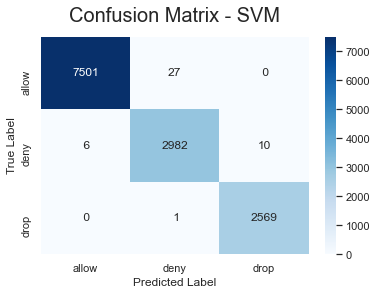

In [29]:
get_confusion_matrix(y_test, predict,mat_title="Confusion Matrix - SVM" )

<div align="center"> Figure 1: SVM Confusion Matrix </div> 

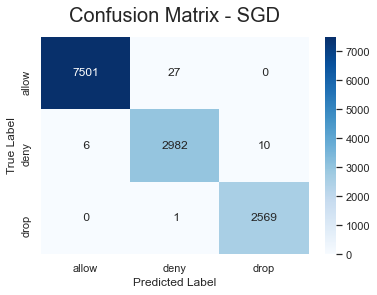

In [31]:
get_confusion_matrix(y_test, predict_sgd, mat_title="Confusion Matrix - SGD" )

<div align="center"> Figure 2: SGD Confusion Matrix </div> 

## 4. Conclusion  


Based on this data, both of these models have extremely high weighted F1 performance from the test set and exactly the same recall/ precision per target class. Given that the performance in both models is the same, to conclude what model is best, it is fair to look at the training performance and efficiency metrics. As can be seen in Table 4, the SVM model took 1 hour and 1 minute to train 100 fits while the SGD model took 42 seconds to train 300 fits. The training time is 78 times longer for the SVM model for 3 times the number of fits compared to the SGD. Considering that the results on the test set are the same, it would make more sense to choose the SGD model as it will be faster to train on future model updates. 

|Model | Training time| Number of Fits|
|---|---|---|
|SVM| 1h 1m| 100| 
|SGD| 42 seconds | 300  | 


<div align="center"> Table 4: Training Time and Number of Fits </div> 
<br>


For future improvements to the classifier, the team can explore further feature selection and feature engineering in order to engineer other useful features. This, however, would require domain knowledge from cyber-security experts. Currently the Source Port, Destination port, NAT source and Destination port features are treated as categorical and all ports known are being one hot encoded. The model is trained only on the known source and destination port levels, which means it might not able to detect malicious new port numbers coming in. To compensate for this lack of knowledge, periodic retraining of the model would be required to incorporate updated knowledge on port levels. Feature engineering, such as a smarter way to first "manually" classify commonly used ports and uncommonly used ports into different categories, along with other knowledge provided by domain experts could facilitate the building of a model that is more robust to attacks and better prepare the company for unknown situations.


## Appendix - Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib

sns.set_theme()
# options
pd.set_option('display.max_columns', None)
# Using fixed os structure

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve, auc, roc_curve,confusion_matrix
from sklearn.linear_model import SGDClassifier

import os
cwd = os.getcwd()
d = os.path.dirname(cwd)
d

# Notebook options
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999
#pd.options.display.float_format = '{:20,.3f}'.format

In [2]:
file = cwd + '/log2.csv'
data = pd.read_csv(file)

In [3]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [6]:
# Delete reset-both level from Action per Dr. Slater instruction
data = data.loc[data['Action']!='reset-both']

In [7]:
print(f"Source Port Unique Levels: {len(data['Source Port'].unique())}")
print(f"Destination Port Unique Levels: {len(data['Destination Port'].unique())}")
print(f"NAT Source Port Unique Levels: {len(data['NAT Source Port'].unique())}")
print(f"NAT Destination Port Unique Levels: {len(data['NAT Destination Port'].unique())}")

Source Port Unique Levels: 22692
Destination Port Unique Levels: 3264
NAT Source Port Unique Levels: 29143
NAT Destination Port Unique Levels: 2533


In [8]:
total_levels = 22692+3264+29143+2533
print(f"total unique values to OneHotEncode all levels: {total_levels}")

total unique values to OneHotEncode all levels: 57632


In [9]:
num_data = data[['Bytes','Bytes Received','Packets','Elapsed Time (sec)','pkts_sent','pkts_received']]

In [10]:
# Look at Correlation from File_1 train.csv
corr1 = num_data.corr().abs()
# See resource below graph
upper_tri = corr1.where(np.triu(np.ones(corr1.shape),k=0).astype(np.bool))

<AxesSubplot:>

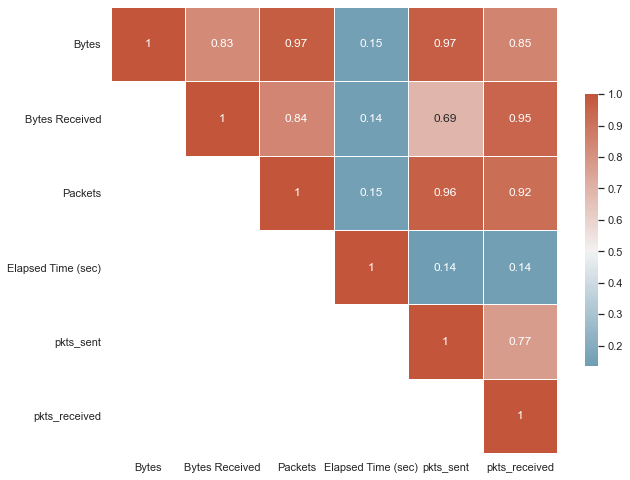

In [11]:
sns.set_theme(style="white")
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(upper_tri, cmap=cmap, vmax=1, center=0.5,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
# Identify attributes with missing data - No missing data found
columns_missing_rate = 100*((data.isna()).sum(axis = 0) / len(data))
columns_missing_rate = pd.DataFrame(columns_missing_rate)
columns_missing_rate = columns_missing_rate.reset_index()
columns_missing_rate.columns = ['name','rate']
print("     Initial Missing Data Inspection with all Attributes In     \n")
print('{:45s} {:4s}%'.format("Variable Name:","Missing Percentage"))
print("________________________________________________________________")
for index, row in columns_missing_rate.iterrows():
    if row['rate'] > 0:
        print(' {:45s} {:4s}%'.format(row['name'],str(np.round(row['rate'],4))))

     Initial Missing Data Inspection with all Attributes In     

Variable Name:                                Missing Percentage%
________________________________________________________________


In [13]:
# Create a function to indicate whether network uses NAT - Network Address Translation
def need_NAT_or_not(num: int) -> int:
    """Indicate whether Network needs Network Address Translation"""
    if num == 0:
        return num
    else:
        return 1

In [14]:
# Apply to Source and Destination NAT port check
data['Source Need NAT'] = data['NAT Source Port'].apply(lambda x: need_NAT_or_not(x))
data['Destination Need NAT'] = data['NAT Destination Port'].apply(lambda x: need_NAT_or_not(x))


In [15]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Need NAT,Destination Need NAT
0,57222,53,54587,53,allow,177,94,83,2,30,1,1,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9,1,1
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7,1,1
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18,1,1


In [16]:
# X, y = data.drop(['NAT Source Port','NAT Destination Port','Action'],inplace=False,axis=1),data['Action']

# X, y using all data levels in Source Port, Destination Port, NAT Source Port, NAT Destination Port
X, y = data.drop(['Action'],inplace=False,axis=1),data['Action']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=43, stratify=y)


In [18]:
X.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Need NAT,Destination Need NAT
0,57222,53,54587,53,177,94,83,2,30,1,1,1,1
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,1,1
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,1,1
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,1,1
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,1,1


In [19]:
y.value_counts()

allow    37640
deny     14987
drop     12851
Name: Action, dtype: int64

In [20]:
# Strategy to OneHotEncode all leveos in these four columns
categorical_ix = ['Source Port','Destination Port','NAT Source Port','NAT Destination Port','Source Need NAT','Destination Need NAT']
numeric_ix = [names for names in X.columns if names not in categorical_ix]


#### Create Helper Functions

In [21]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

def cv_summary(estimator, columns):
    df = pd.DataFrame(estimator.cv_results_)
    cv_result_summary = df[columns]
    cv_result_summary.index  = np.arange(1,len(cv_result_summary)+1)
    cv_result_summary = cv_result_summary.reset_index()
    cv_result_summary = cv_result_summary.rename(columns = {
        "index": "param_combination", "mean_test_score": "mean_validation_score",
        "rank_test_score": "rank_validation_score"
    })
    return cv_result_summary
def get_acc_score(model, x, y):
    """
    Calculates socre from estimator (gridsearch) inherit scorer 
    """
    return model.score(x, y)


def get_confusion_matrix(y, yhat,mat_title="Confusion Matrix"):
    x_axis_labels = ['allow','deny','drop']
    y_axis_labels = ['allow','deny','drop']
    cm_n = confusion_matrix(y, yhat)
    ax = sns.heatmap(cm_n,cmap='Blues',annot=True,fmt='2d',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    ax.set_title(mat_title,fontdict={'fontsize':20},pad=15)

def get_classification_report(x_train, y_train, x_test, y_test, pred, model):
    """
    This function is used to get comprehensive classification report for binary response:
    Training Accuracy, Test Accuracy, print classification_report, plot confusion matrix.
    """
    print(f"Training Score: {get_acc_score(model, x_train, y_train):,.6f}")
    print("Test result:")
    print(classification_report(y_test,pred,digits=6))
    get_confusion_matrix(y_test,pred)
    
    
    
# def get_classification_report_multi_response(x_train, y_train, x_test, y_test, pred, model):
#     """
#     This function is used to get comprehensive classification report for multiple response:
#     Training Accuracy, Test Accuracy, print classification_report, plot confusion matrix.
#     """
#     print(f"Weighted AUC: {get_acc_score(model, x_train, y_train):,.5f}")
#     print("Classification Report:")
#     print(classification_report(y_test,pred))
#     cm_n = confusion_matrix(y_test,pred)
#     ax = sns.heatmap(cm_n,cmap='Blues',annot=True,fmt='2d',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#     ax.set(xlabel='Predicted Label', ylabel='True Label')
#     ax.set_title("Confusion Matrix",fontdict={'fontsize':20},pad=15)

#### Support Vector Classifier Model

In [22]:
params_svc = {
    "model__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "model__gamma": ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001],
    "model__kernel":["linear", "poly", "rbf"],
    "model__class_weight":["balanced"]
}

#### Result for keeping all original levels for training

In [30]:
%%time

# define preprocessing for columns
t = [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), 
     ('scale', MinMaxScaler(), numeric_ix)]
col_transform = ColumnTransformer(t)
model_svc = SVC()
pipeline_svc = Pipeline(steps=[('preprocessing',col_transform), ('model', model_svc)])

#Fit
clf_svc = RandomizedSearchCV(pipeline_svc, params_svc, n_iter=10, scoring='f1_weighted',
                             random_state=123, verbose=15, cv=cv, n_jobs=-2,return_train_score=True)
search_svc = clf_svc.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 1min 3s, sys: 1.47 s, total: 1min 5s
Wall time: 1h 1min 39s


In [31]:
df_search_svc_cv_results_columns = ['param_model__kernel',"param_model__gamma","param_model__class_weight",
                                    "param_model__C","mean_train_score","mean_test_score","rank_test_score"]
df_search_svc_cv_results = cv_summary(search_svc, df_search_svc_cv_results_columns)
df_search_svc_cv_results

,param_combination,param_model__kernel,param_model__gamma,param_model__class_weight,param_model__C,mean_train_score,mean_validation_score,rank_validation_score
0,1,poly,auto,balanced,0.001,0.066488,0.066490,10
1,2,poly,0.1,balanced,100,0.998512,0.997349,3
2,3,rbf,auto,balanced,10,0.990844,0.990845,6
3,4,linear,0.0001,balanced,1,0.998264,0.997330,4
4,5,linear,scale,balanced,0.1,0.996068,0.996034,5
5,6,poly,1,balanced,0.01,0.998258,0.997387,1
6,7,rbf,1,balanced,0.01,0.990844,0.990845,6
7,8,rbf,auto,balanced,100,0.990844,0.990845,6
8,9,poly,0.1,balanced,10,0.998258,0.997387,1
9,10,linear,0.01,balanced,0.01,0.990844,0.990845,6


Training Score: 0.998245
Test result:
              precision    recall  f1-score   support

       allow   0.999201  0.996413  0.997805      7528
        deny   0.990698  0.994663  0.992676      2998
        drop   0.996123  0.999611  0.997864      2570

    accuracy                       0.996640     13096
   macro avg   0.995340  0.996896  0.996115     13096
weighted avg   0.996650  0.996640  0.996643     13096



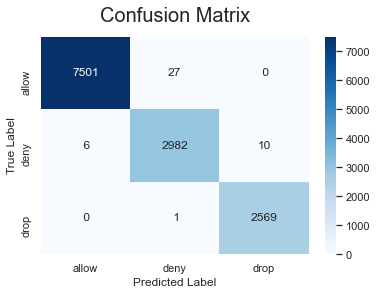

In [28]:
predict = search_svc.predict(X_test)
get_classification_report(X_train, y_train, X_test, y_test, predict, search_svc)

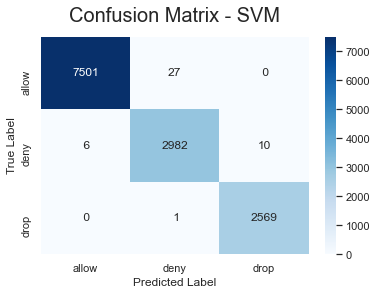

In [29]:
get_confusion_matrix(y_test, predict,mat_title="Confusion Matrix - SVM" )

In [26]:
file_name_svc = "search_svc_model.sav"
#joblib.dump(search_svc, file_name_svc)
search_svc = joblib.load(file_name_svc)

#### SGD Classifier - SKlearn

In [23]:
params_sgd = [
    # optimal learning rate
    {
        "model__learning_rate": ["optimal"],
        "model__alpha": [0.000001, 0.00001, 0.0001, 0.001, 0.01],
        "model__eta0": [0],
        "model__class_weight":["balanced"]
    },
    # constant learning rate (eta0 cannot be 0 for this)
    {
    "model__learning_rate": ["constant"],
    "model__alpha": [0.000001, 0.00001, 0.0001, 0.001, 0.01],
    "model__eta0": [0.01, 0.1, 1.0, 5, 10],
    "model__class_weight":["balanced"]
    }
]

In [36]:
%%time

# define preprocessing for columns
t = [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), 
     ('scale', MinMaxScaler(), numeric_ix)]
col_transform = ColumnTransformer(t)
model_sgd = SGDClassifier(loss = 'log')
pipeline_sgd = Pipeline(steps=[('preprocessing',col_transform), ('model', model_sgd)])

#Fit
clf_sgd = GridSearchCV(pipeline_sgd, params_sgd, scoring='f1_weighted',
                             verbose=15, cv=cv, n_jobs=-2,return_train_score=True)
search_sgd = clf_sgd.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
CPU times: user 4.31 s, sys: 1.07 s, total: 5.38 s
Wall time: 42.1 s


In [37]:
df_search_sgd_cv_results_columns = ["param_model__alpha","param_model__eta0","param_model__learning_rate",
                                    "mean_train_score","mean_test_score","rank_test_score"]
df_search_sgd_cv_results = cv_summary(search_sgd, df_search_sgd_cv_results_columns)
df_search_sgd_cv_results

,param_combination,param_model__alpha,param_model__eta0,param_model__learning_rate,mean_train_score,mean_validation_score,rank_validation_score
0,1,0.000001,0,optimal,0.998456,0.997061,1
1,2,0.00001,0,optimal,0.997350,0.996777,4
2,3,0.0001,0,optimal,0.996044,0.996034,11
3,4,0.001,0,optimal,0.990844,0.990845,20
4,5,0.01,0,optimal,0.990844,0.990845,20
5,6,0.000001,0.01,constant,0.996033,0.996034,11
6,7,0.000001,0.1,constant,0.996959,0.996415,7
7,8,0.000001,1.0,constant,0.998114,0.997060,2
8,9,0.000001,5,constant,0.997796,0.997023,3
9,10,0.000001,10,constant,0.996982,0.996643,6


Training Score: 0.998474
Test result:
              precision    recall  f1-score   support

       allow   0.999201  0.996413  0.997805      7528
        deny   0.990698  0.994663  0.992676      2998
        drop   0.996123  0.999611  0.997864      2570

    accuracy                       0.996640     13096
   macro avg   0.995340  0.996896  0.996115     13096
weighted avg   0.996650  0.996640  0.996643     13096



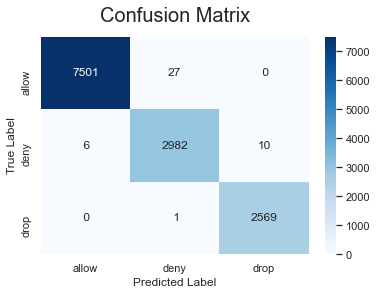

In [30]:
predict_sgd = search_sgd.predict(X_test)
get_classification_report(X_train, y_train, X_test, y_test, predict_sgd, search_sgd)

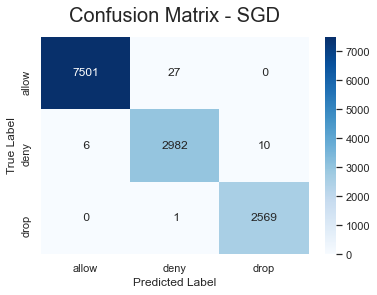

In [31]:
get_confusion_matrix(y_test, predict_sgd, mat_title="Confusion Matrix - SGD" )

In [24]:
file_name_sgd = "search_sgd_model.sav"
# joblib.dump(search_sgd, file_name_sgd)
search_sgd = joblib.load(file_name_sgd)